In [1]:
import importlib
import preprocessing
importlib.reload(preprocessing)
from preprocessing import *


In [ ]:
#224x224 

In [21]:
BATCH_SIZE=16
IMAGE_SIZE=(640,640)
train_loader,val_loader=create_dataloader(IMAGE_SIZE,batch_size=BATCH_SIZE,bbox_out=False)
val_dataset = val_loader.dataset

In [22]:
class DiceLoss(nn.Module):
    def __init__(self, smooth=1e-6):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, inputs, targets):
        # Flatten the tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        # Calculate intersection and union
        intersection = (inputs * targets).sum()
        dice = (2. * intersection + self.smooth) / (inputs.sum() + targets.sum() + self.smooth)
        
        return 1 - dice


dice_loss = DiceLoss()

In [23]:
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)

Using cache found in /Users/anton_heden/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


In [3]:
import torch
import train 
importlib.reload(train)
from train import training_loop


# Define the optimizer and loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0005)
loss_fn= DiceLoss()
unet_metrics=training_loop(model, optimizer, loss_fn, train_loader, val_loader, num_epochs=14)


NameError: name 'model' is not defined

In [14]:
import visualisation
importlib.reload(visualisation)
from visualisation import *
#save_model_to_file(unet_metrics, 'unet_brain2_seg.pth')


plot_performance_metrics([unet_metrics],batch_size=BATCH_SIZE)
val_dataset = val_loader.dataset


# Plot comparison for a specific index
plot_comparison([0,1,2], val_dataset, unet_metrics[0])

NameError: name 'unet_metrics' is not defined

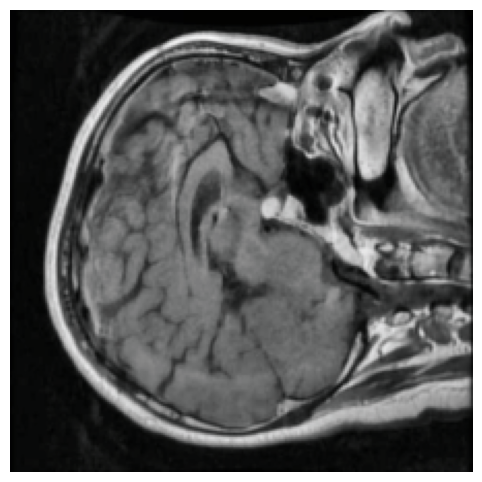

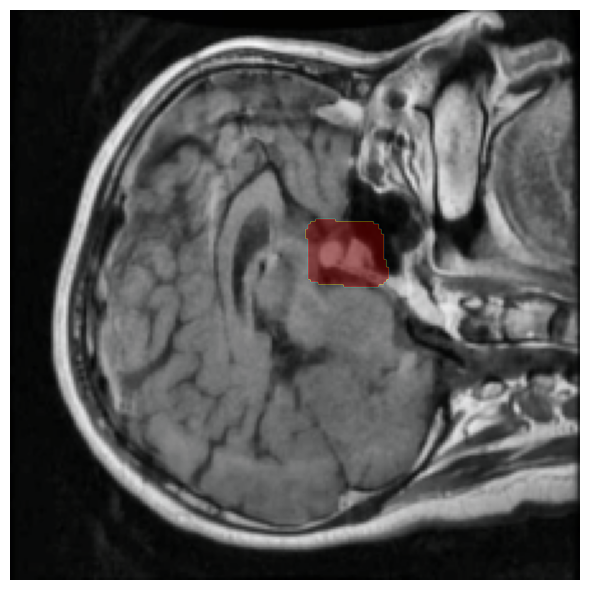

In [38]:
import visualisation
importlib.reload(visualisation)
from visualisation import *
# Load the model and performance metrics
trained_metrics = get_model_and_performance_metrics("unet_brain_seg.pth", model)
#plot_performance_metrics([trained_metrics],batch_size=16)

# Get the validation dataset
val_dataset = val_loader.dataset


# Plot comparison for a specific index
#Crea list from 20 to 50


plot_comparison([74], val_dataset, model)